In [13]:
# Adapted from Hands-on Machine Learning https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from tqdm import tqdm


# Make the font the same as latex 
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('xtick', labelsize=16)
rc('ytick', labelsize=16)

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=10)
    train_errors, val_errors = [], []
    for m in tqdm(range(1, len(X_train) + 1, 100)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
    plt.legend(loc="upper right", fontsize=16)   
    plt.xlabel("Training set size", fontsize=20) 
    plt.ylabel("RMSE", fontsize=20) 

In [47]:
# model = XGBRegressor(n_estimators=1100, min_child_weight=2, max_depth=10, learning_rate=0.2)
model = RandomForestRegressor(max_depth=60, min_samples_leaf=1, min_samples_split=2, n_estimators=775)
scaler = StandardScaler() # Initialize scaler
pipeline = Pipeline(steps=[('normalize', scaler), ('model', model)]) # Create pipeline with scaler and model

In [48]:
# Import data and preprocess
df = pd.read_csv("../test_data/patch_antenna/Patch Antenna S11 Data.csv")
df = df.drop(df[df['dB(S(1,1)) []'] > 0].index) # Remove all rows with positive s11
# Split into x and y
input_x = df.drop(columns=['dB(S(1,1)) []'], axis=1)
input_y = df[['dB(S(1,1)) []']]

In [49]:
print("Starting")

Starting


  0%|          | 0/7 [00:00<?, ?it/s]/opt/miniconda3/envs/tylers_env_do_not_touch/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
 14%|█▍        | 1/7 [00:00<00:02,  2.12it/s]/opt/miniconda3/envs/tylers_env_do_not_touch/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
 29%|██▊       | 2/7 [00:01<00:02,  1.94it/s]/opt/miniconda3/envs/tylers_env_do_not_touch/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimat

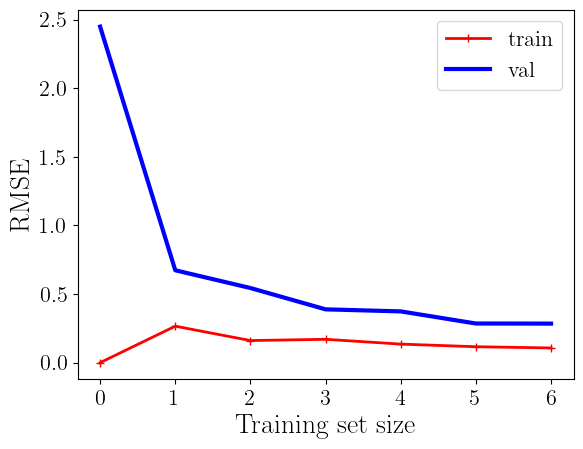

In [50]:
plot_learning_curves(pipeline, input_x.iloc[0:1000], input_y.iloc[0:1000])
# plt.axis([0, 300, 0, 1000])
plt.show()

In [19]:
print("DONE")

DONE


In [20]:
plt.save("patch_learning_curve.png")

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'